In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading in our data

# just has a lot of statistics that we can choose from
df_everything = pd.read_csv('/Users/adamzhang/Purdue Local/CS 17600/Final Project/Data/WDI_everything.csv')

# % of the population using the internet
df_internet = pd.read_csv('/Users/adamzhang/Purdue Local/CS 17600/Final Project/Data/WDI_internet.csv')

# GDP per Capita
df_GDP = pd.read_csv('/Users/adamzhang/Purdue Local/CS 17600/Final Project/Data/WDI_GDPperCapita.csv')

# labels for the income of a country based on GDP
df_incomeGroup = pd.read_csv('/Users/adamzhang/Purdue Local/CS 17600/Final Project/Data/WDI_labels.csv')


In [3]:
# cleaning and filtering each data set (besides df_GDPlabel)

df_incomeGroup_clean = df_incomeGroup[['Country Code', 'Region','IncomeGroup']]
df_incomeGroup_clean = df_incomeGroup_clean.rename(columns={'Country Code': 'WDI', 'IncomeGroup': 'Income Group'})
df_incomeGroup_clean.set_index('WDI', inplace = True)

def filter(df):

    # removes the unnecessary rows with no data
    df = df[4:]

    # remove any possible duplicates
    df = df.drop_duplicates()

    # rename columns to more appropriate names
    df = df.rename(columns={'Data Source': 'Country', 'World Development Indicators': 'WDI', 'Indicator Name': 'Statistic'})

    # remove the column 'Indicator Code'
    df.drop('Indicator Code', axis = 1, inplace = True)

    # set a multi-index
    df.set_index(['Country', 'WDI', 'Statistic'], inplace = True)

    # forward fill all of the values so that 2024 is the most recent value
    df.ffill(axis = 1, inplace = True)

    # only take the most recent values (all in the 2024 column)
    df = df[['2024']]
    df.rename(columns={'2024': 'Value'}, inplace = True)


    # change the index to only WDI for merging
    df.reset_index(level=['Country', 'Statistic'], inplace = True)
    
    # add the income group of each country
    df = pd.merge(df, df_incomeGroup_clean, how = 'inner', left_index = True, right_index = True)

    # put 'Statistic' as the index again
    df.reset_index(inplace = True)
    df.set_index('Statistic', inplace = True)

    # re-order columns
    df = df[['WDI', 'Region', 'Income Group', 'Country', 'Value']]

    # drop all countries that weren't't given an Income Group
    df = df.dropna(subset=['Income Group'])
    
    return(df)

df_everything_clean = filter(df_everything)
df_internet_clean = filter(df_internet)
df_GDP_clean = filter(df_GDP)

# first I will rename 'Value' to something more meaningful
df_internet_clean.rename(columns={'Value': 'Internet'}, inplace = True)
df_GDP_clean.rename(columns={'Value': 'GDP'}, inplace = True)

display(df_everything_clean)
display(df_internet_clean)
display(df_GDP_clean)

,WDI,Region,Income Group,Country,Value
Statistic,,,,,
Population ages 15-64 (% of total population),ABW,Latin America & Caribbean,High income,Aruba,66.098801
Population ages 0-14 (% of total population),ABW,Latin America & Caribbean,High income,Aruba,16.844876
"Unemployment, total (% of total labor force) (modeled ILO estimate)",ABW,Latin America & Caribbean,High income,Aruba,NaN
"Unemployment, male (% of male labor force) (modeled ILO estimate)",ABW,Latin America & Caribbean,High income,Aruba,NaN
"Unemployment, female (% of female labor force) (modeled ILO estimate)",ABW,Latin America & Caribbean,High income,Aruba,NaN
...,...,...,...,...,...
"Literacy rate, adult female (% of females ages 15 and above)",ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,93.360001
"Literacy rate, youth total (% of people ages 15-24)",ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,92.510002
"Literacy rate, youth male (% of males ages 15-24)",ZWE,Sub-Saharan Africa,Lower middle income,Zimbabwe,90.769997


,WDI,Region,Income Group,Country,Internet
Statistic,,,,,
Individuals using the Internet (% of population),ABW,Latin America & Caribbean,High income,Aruba,97.1700
Individuals using the Internet (% of population),AFG,Middle East & North Africa,Low income,Afghanistan,17.7089
Individuals using the Internet (% of population),AGO,Sub-Saharan Africa,Lower middle income,Angola,44.7581
Individuals using the Internet (% of population),ALB,Europe & Central Asia,Upper middle income,Albania,83.1356
Individuals using the Internet (% of population),AND,Europe & Central Asia,High income,Andorra,95.4456
...,...,...,...,...,...
Individuals using the Internet (% of population),XKX,Europe & Central Asia,Upper middle income,Kosovo,89.4430
Individuals using the Internet (% of population),YEM,Middle East & North Africa,Low income,"Yemen, Rep.",13.8152
Individuals using the Internet (% of population),ZAF,Sub-Saharan Africa,Upper middle income,South Africa,75.6592


,WDI,Region,Income Group,Country,GDP
Statistic,,,,,
GDP per capita (current US$),ABW,Latin America & Caribbean,High income,Aruba,33984.790620
GDP per capita (current US$),AFG,Middle East & North Africa,Low income,Afghanistan,413.757895
GDP per capita (current US$),AGO,Sub-Saharan Africa,Lower middle income,Angola,2122.083690
GDP per capita (current US$),ALB,Europe & Central Asia,Upper middle income,Albania,10011.627986
GDP per capita (current US$),AND,Europe & Central Asia,High income,Andorra,49303.673390
...,...,...,...,...,...
GDP per capita (current US$),XKX,Europe & Central Asia,Upper middle income,Kosovo,7299.434981
GDP per capita (current US$),YEM,Middle East & North Africa,Low income,"Yemen, Rep.",633.887202
GDP per capita (current US$),ZAF,Sub-Saharan Africa,Upper middle income,South Africa,6253.371582


In [ ]:
#### NOTES ####

# now we can just choose which statistic we want to compare using the cleaned data from above
# we can compare against GDP, Region, Income Group, Country, etc.

# scatter and bar plots have been done for Internet %

# box plots have been done for Literacy rates

# I would stick to the trend of doing education related things, but basically anything works from the df_everything_cleaned dataframe


#### NOTES ####

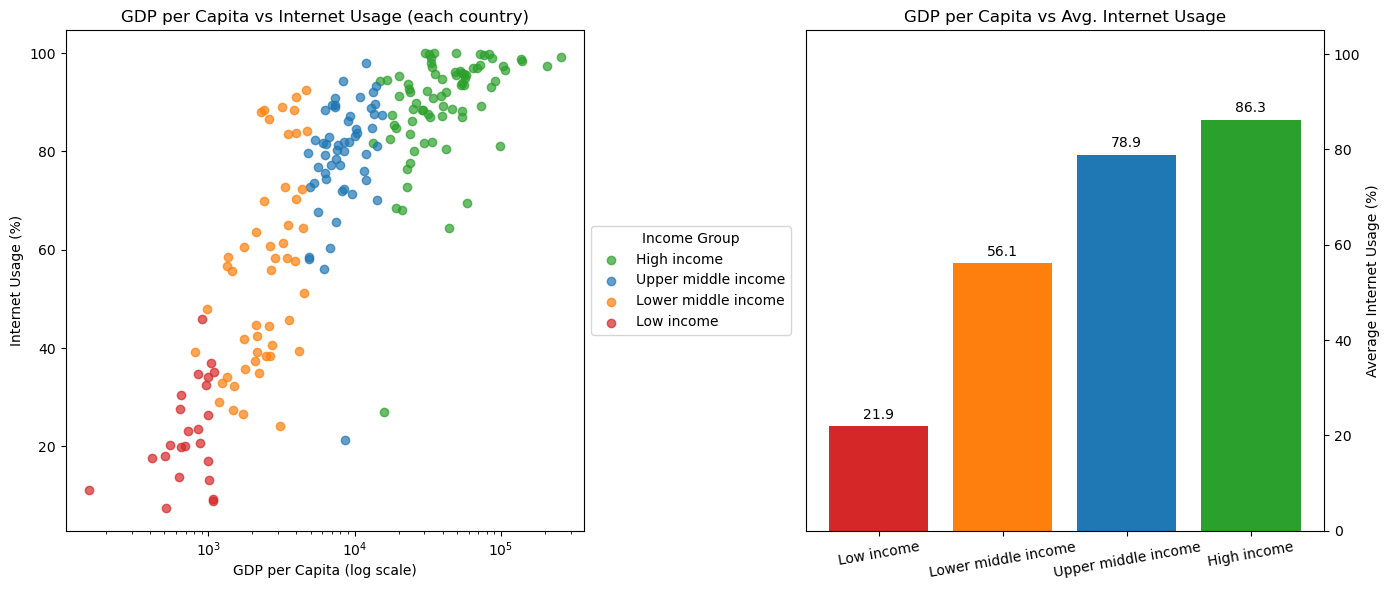

In [4]:
# Income Group comparison for the percentage of the population using the Internet

# setting up a pivot table to get the average % of population for each income group
# this will be for a bar plot
df_internet_pivot = df_internet_clean.pivot_table(index='Income Group', values='Internet', aggfunc='mean')
df_internet_pivot.reset_index(inplace = True)
df_internet_pivot.sort_values('Internet', ascending = True, inplace = True)         # sorted values so that it will plot in order

# setting up for a scatter plot of GDP range vs. % of population using the Internet
df_internet_GDP = pd.merge(df_GDP_clean, df_internet_clean, how = 'outer')
df_internet_GDP = df_internet_GDP.loc[df_internet_GDP['Internet']>0]

# display(df_internet_pivot)

# setting up a subplot to put both plots on
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# the order I want for the legend
order = [
    'High income',
    'Upper middle income',
    'Lower middle income',
    'Low income'
]

# the colors I want for the legend
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green']

# scatter plot
ax1 = ax[0]

# group by income group to make labels for the legend
df_internet_grouped = df_internet_GDP.groupby('Income Group')

# plot each income group as its own color
i = 3

for income_group in order:
    df_group = df_internet_grouped.get_group(income_group)  # get the group by name
    ax1.scatter(df_group['GDP'], df_group['Internet'], label=income_group, alpha=0.7, c=colors[i])
    i -= 1

ax1.set_xscale('log')
ax1.set_xlabel('GDP per Capita (log scale)')
ax1.set_ylabel('Internet Usage (%)')
ax1.set_title('GDP per Capita vs Internet Usage (each country)')

ax1.legend(
    title='Income Group',
    loc='center left',        # select the bottom left of the legend
    bbox_to_anchor=(1, 0.5)   # move all the way to the right and up halfway
)

# bar plot
ax2 = ax[1]

internetBars = ax2.bar(df_internet_pivot['Income Group'], df_internet_pivot['Internet'], color = colors)
ax2.bar_label(internetBars, fmt='%.1f', padding=3)

ax2.tick_params(axis='x', labelrotation=10)

ax2.set_ylabel('Average Internet Usage (%)')
ax2.set_ylim(0, 105)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()

ax2.set_title('GDP per Capita vs Avg. Internet Usage')

# make everything fit nicely
fig.tight_layout()

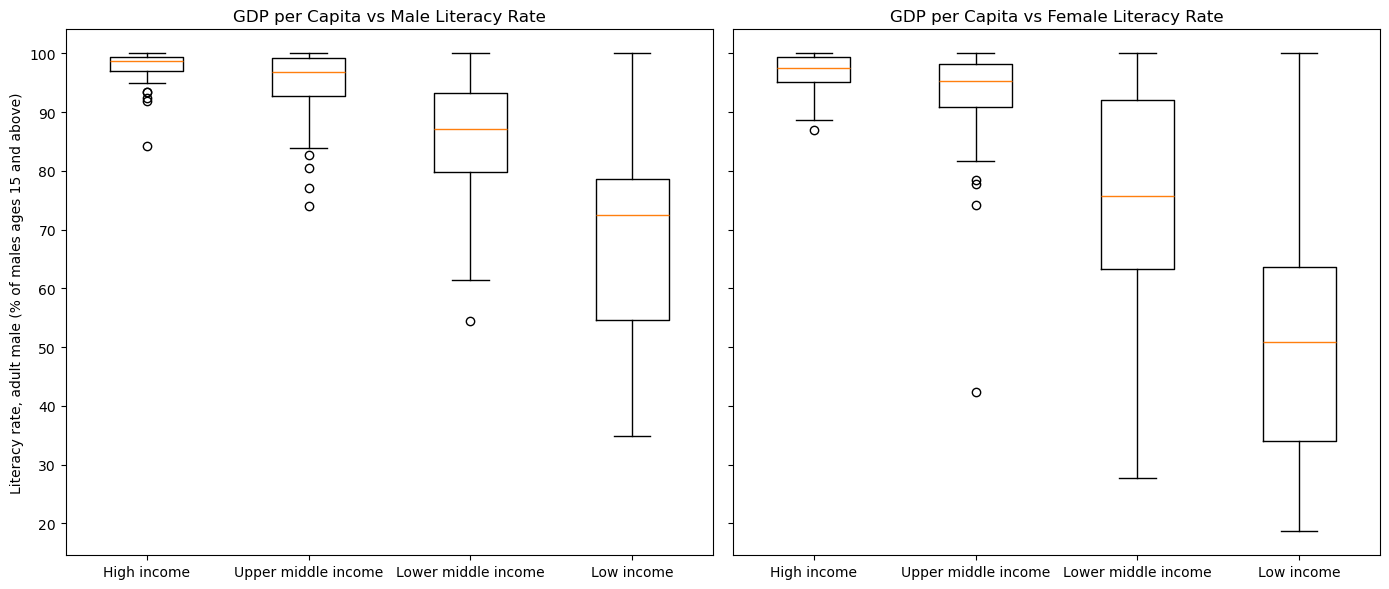

In [5]:
# Literacy rates (male and female) compared to GDP per capita

# get the data from the larger dataframe
df_maleLiteracy = df_everything_clean.loc['Literacy rate, adult male (% of males ages 15 and above)']
df_femaleLiteracy = df_everything_clean.loc['Literacy rate, adult female (% of females ages 15 and above)']

df_maleLiteracy = df_maleLiteracy.rename(columns={'Value': 'Male Literacy'})
df_femaleLiteracy = df_femaleLiteracy.rename(columns={'Value': 'Female Literacy'})

# merge to put all data in one dataframe to make sure that all Na's removed will be even across the dataframes
df_femaleLiteracy[['WDI', 'Female Literacy']]
df_literacy = pd.merge(df_maleLiteracy, df_femaleLiteracy, how = 'outer')

# remove any NaN values
df_literacy = df_literacy.dropna()

# the order I want for the legend
order = [
    'High income',
    'Upper middle income',
    'Lower middle income',
    'Low income'
]

# get the averages for each Income Group
ls_male_literacy = []
ls_female_literacy = [] 

df_literacy_grouped = df_literacy.groupby('Income Group')

for income_group in order:
    df_group = df_literacy_grouped.get_group(income_group)  # get the group by name
    ls_male_literacy.append(df_group['Male Literacy'])
    ls_female_literacy.append(df_group['Female Literacy'])

# display(df_literacy)

# setting up a subplot to put both plots (male vs. female) on
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# for incomeGroup in 

ax1 = ax[0]
ax1.boxplot(ls_male_literacy, tick_labels=['High income', 'Upper middle income', 'Lower middle income', 'Low income'])

ax1.set_ylabel('Literacy rate, adult male (% of males ages 15 and above)')
ax1.set_title('GDP per Capita vs Male Literacy Rate')

ax2 = ax[1]
ax2.boxplot(ls_female_literacy, tick_labels=['High income', 'Upper middle income', 'Lower middle income', 'Low income'])

ax2.set_title('GDP per Capita vs Female Literacy Rate')

fig.tight_layout()

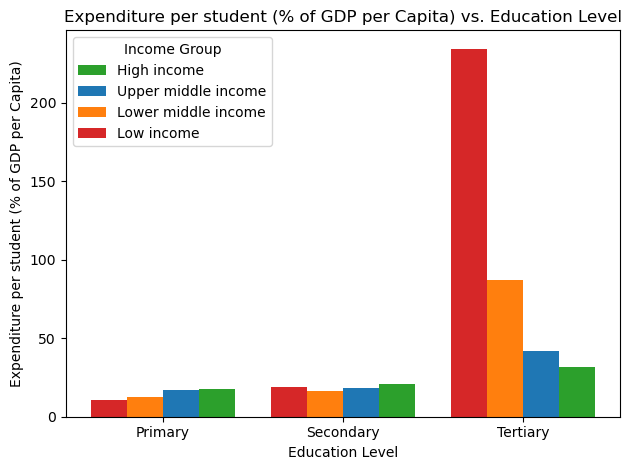

In [6]:
# Grouped bar chart for Government expenditure per student for each level of education vs. Income group (GDP per Capita)

# filter data
df_primary = df_everything_clean.loc['Government expenditure per student, primary (% of GDP per capita)']
df_secondary = df_everything_clean.loc['Government expenditure per student, secondary (% of GDP per capita)']
df_tertiary = df_everything_clean.loc['Government expenditure per student, tertiary (% of GDP per capita)']

df_primary = df_primary.rename(columns={'Value': 'Primary'}).reset_index()
df_secondary = df_secondary.rename(columns={'Value': 'Secondary'}).reset_index()
df_tertiary = df_tertiary.rename(columns={'Value': 'Tertiary'}).reset_index()

# add data into one dataframe for easier use
df_expenditure = pd.concat([df_primary['Income Group'],
                        df_primary[['Primary']],
                        df_secondary[['Secondary']],
                        df_tertiary[['Tertiary']]], axis=1)

# cleaning data by dropping NaN and 0 values
df_expenditure.dropna(inplace = True)

df_expenditure = df_expenditure[
    (df_expenditure['Primary'] != 0) &
    (df_expenditure['Secondary'] != 0) &
    (df_expenditure['Tertiary'] != 0)]

# use a pivot_table to get the average for each column by Income Group
df_expenditure_pivot = df_expenditure.pivot_table(index = 'Income Group', values = ['Primary', 'Secondary', 'Tertiary'], aggfunc = 'mean')

# plotting a grouped bar chart (just using the code the professor showed us in class)

categories = [
    'Primary',
    'Secondary',
    'Tertiary'
]

xpos = pd.array(range(3))
bwidth = .2
colors = ['tab:red', 'tab:orange', 'tab:blue', 'tab:green']

fig, ax = plt.subplots(1)

high = plt.bar(xpos+3*bwidth/2, df_expenditure_pivot.loc['High income',:], bwidth, color=colors[3], label = 'High income')
upperMiddle = plt.bar(xpos+bwidth/2, df_expenditure_pivot.loc['Upper middle income',:], bwidth, color=colors[2], label = 'Upper middle income')
lowerMiddle = plt.bar(xpos-bwidth/2, df_expenditure_pivot.loc['Lower middle income',:], bwidth, color=colors[1], label = 'Lower middle income')
low = plt.bar(xpos-3*bwidth/2, df_expenditure_pivot.loc['Low income',:], bwidth, color=colors[0], label = 'Low income')


plt.legend(title = 'Income Group')
ax.set_xticks(xpos)
ax.set_xticklabels(categories)
ax.set_xlabel('Education Level')
ax.set_ylabel('Expenditure per student (% of GDP per Capita)')
plt.title('Expenditure per student (% of GDP per Capita) vs. Education Level')

fig.tight_layout()